In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [5]:
csv_path = Path(r'../data/president_heights.csv')
df = pd.read_csv(csv_path)
df.head(2)


,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170


In [9]:
df.describe()

,order,height(cm)
count,44.000000,44.000000
mean,23.522727,180.045455
std,13.729087,7.064337
min,1.000000,163.000000
25%,11.750000,174.750000
50%,24.000000,182.000000
75%,35.250000,183.500000
max,46.000000,193.000000


In [15]:
idx = df['height(cm)'].idxmax()
df.iloc[idx]

order                      16
name          Abraham Lincoln
height(cm)                193
Name: 15, dtype: object

In [16]:
df.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [23]:
'George Washington'.split()

['George', 'Washington']

In [38]:
df['ad'] = df['name'].str.lower().str.split().str[0]
df['soyad'] = df['name'].str.lower().str.split().str[-1]
# df = df.drop('name', axis='columns')
df[df['soyad'] == 'trump']

,order,name,height(cm),ad,soyad
42,45,Donald Trump,191,donald,trump


In [44]:
df['name_len'] = df['name'].str.split().str.len()
df[df['name_len'] == 4]

,order,name,height(cm),ad,soyad,name_len
38,41,George H. W. Bush,188,george,bush,4


In [47]:
df[df['name'].str.endswith('d')]

,order,name,height(cm),ad,soyad,name_len
19,20,James A. Garfield,183,james,garfield,3
35,38,Gerald Ford,183,gerald,ford,2


In [50]:
df[df['name'].str[-2:] == 'mp']

,order,name,height(cm),ad,soyad,name_len
42,45,Donald Trump,191,donald,trump,2


In [52]:
import datetime
gun = datetime.datetime(year=2024, month=9, day=23)
gun

datetime.datetime(2024, 9, 23, 0, 0)

In [75]:
bugun = datetime.datetime.today()
bugun

datetime.datetime(2025, 12, 29, 19, 24, 55, 27972)

In [79]:
td = bugun - gun
td.days

462

In [ ]:
%pip install yfinance

In [1]:
import yfinance as yf
import datetime

data = yf.download(
    tickers='NVDA',
    start='2022-01-01',
    end=datetime.datetime.today(),
)
data

C:\Users\user\AppData\Local\Temp\ipykernel_13700\1571888193.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2022-01-03,30.062765,30.651625,29.727414,29.757357,391547000
2022-01-04,29.233372,30.409094,28.294191,30.218463,527154000
2022-01-05,27.550632,29.359130,27.479771,28.893031,498064000
2022-01-06,28.123522,28.383019,27.012675,27.586562,454186000
2022-01-07,27.194324,28.367054,27.004691,28.086597,409939000
...,...,...,...,...,...
2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400
2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600


In [6]:
df = data.droplevel(level=1, axis='columns').reset_index()
df.head(3)

Price,Date,Close,High,Low,Open,Volume
0,2022-01-03,30.062765,30.651625,29.727414,29.757357,391547000
1,2022-01-04,29.233372,30.409094,28.294191,30.218463,527154000
2,2022-01-05,27.550632,29.359130,27.479771,28.893031,498064000


In [17]:
df[df['Date'] >= '2025-03-23']

Price,Date,Close,High,Low,Open,Volume
807,2025-03-24,121.387970,122.197821,119.318338,119.858241,228452500
808,2025-03-25,120.668098,121.267988,118.898415,120.528124,167447200
809,2025-03-26,113.739357,118.818429,112.689544,118.708456,293463300
810,2025-03-27,111.409782,114.429231,110.639925,111.329795,236902100
811,2025-03-28,109.650101,112.849525,109.050211,111.469770,229872500
...,...,...,...,...,...,...
996,2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400
997,2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600
998,2025-12-24,188.610001,188.910004,186.589996,187.940002,65528500
999,2025-12-26,190.529999,192.690002,188.000000,189.919998,139393400


In [13]:
df[df['Date'].dt.year == 2025]

Price,Date,Close,High,Low,Open,Volume
753,2025-01-02,138.272186,138.842038,134.593200,135.962820,198247200
754,2025-01-03,144.430496,144.860371,139.691787,139.971709,229322500
755,2025-01-06,149.389130,152.118394,147.779585,148.549363,265377400
756,2025-01-07,140.101669,153.088122,139.971700,152.988143,351782200
757,2025-01-08,140.071686,143.910632,137.522380,142.541012,227349900
...,...,...,...,...,...,...
996,2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400
997,2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600
998,2025-12-24,188.610001,188.910004,186.589996,187.940002,65528500
999,2025-12-26,190.529999,192.690002,188.000000,189.919998,139393400


In [ ]:
df

In [22]:
df['Date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
996     2025
997     2025
998     2025
999     2025
1000    2025
Name: Date, Length: 1001, dtype: int32

In [ ]:
%pip install matplotlib

In [54]:
hex(128)

'0x80'

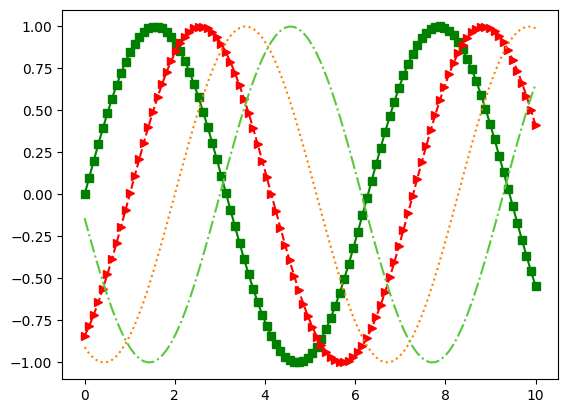

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)

plt.plot(x, np.sin(x), color='green', linestyle='-', marker='s')
plt.plot(x, np.sin(x-1), color='r', linestyle='--', marker='>')
plt.plot(x, np.sin(x-2), color=(1,0.5,0), linestyle=':') # red, green, blue
plt.plot(x, np.sin(x-3), color="#59c83a", linestyle='-.') # red, green, blue

In [76]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [88]:
# df[df['Date'].dt.year >= 2024]
df_2025 = df[df['Date'] >= '2025-01-01']

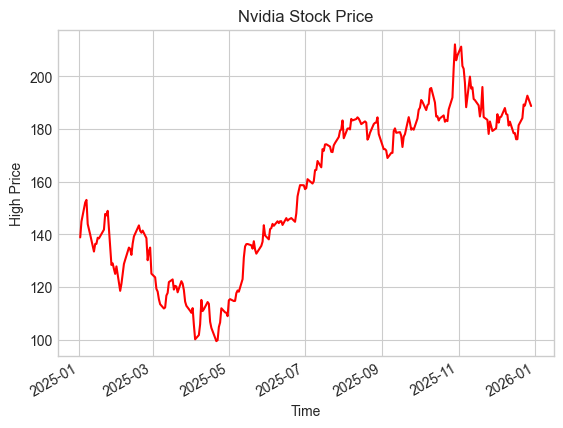

In [89]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(df_2025['Date'], df_2025['High'], color='red')
plt.gcf().autofmt_xdate()
plt.title('Nvidia Stock Price')
plt.xlabel('Time')
plt.ylabel('High Price')
plt.savefig('nvidia2025.png')

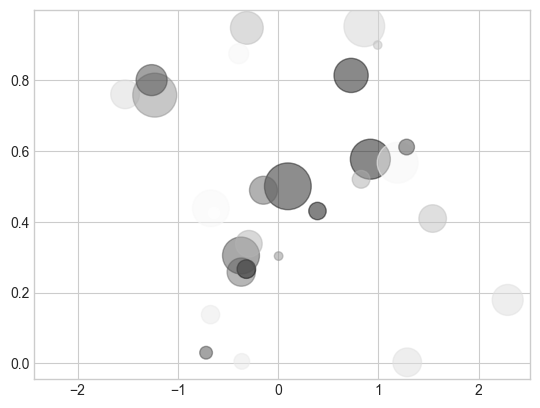

In [210]:
rng = np.random.default_rng(123)
x = rng.normal(0,1,50)
y = rng.uniform(0,1,50)
s = rng.normal(0,1,50) * 500
c = rng.uniform(0,1,50)
plt.scatter(x,y,marker='o', s=s, c=c, alpha=0.5)

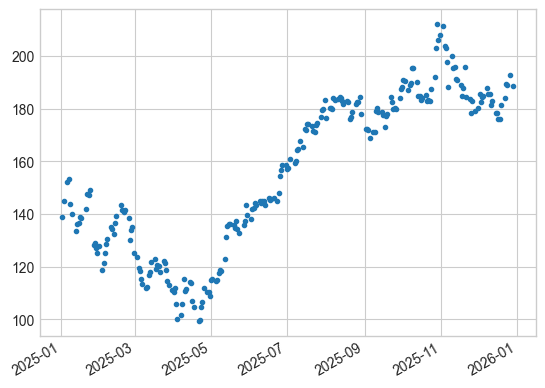

In [101]:
# plt.plot(df_2025['Date'], df_2025['High'], linestyle='', marker='.')
plt.scatter(df_2025['Date'], df_2025['High'],  marker='.')
plt.gcf().autofmt_xdate()